In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import vectfit as m

### Function vectfit

In [2]:
print(m.vectfit.__doc__)

vectfit(f: numpy.ndarray[float64], s: numpy.ndarray[float64], poles: numpy.ndarray[complex128], weight: numpy.ndarray[float64], n_polys: int=0, skip_pole: bool=False, skip_res: bool=False) -> Tuple[numpy.ndarray[complex128], numpy.ndarray[float64], numpy.ndarray[complex128], float, numpy.ndarray[float64]]


        Fast Relaxed Vector Fitting function

        A robust numerical method for rational approximation. It updates the
        poles and calculates residues based on guessed poles.

        Parameters
        ----------
        f : numpy.ndarray
            A 2D array of the sample signals to be fitted, (Nv, Ns)
        s : numpy.ndarray
            A 1D array of the sample points, (Ns)
        poles : numpy.ndarray [complex]
            Initial poles, real or complex conjugate pairs, (N)
        weight : numpy.ndarray
            2D array for weighting f, to control the accuracy of the
            approximation, (Nv, Ns)
        n_polys : int
            Number of polynomial co

In [3]:
# construting signal
Ns = 101
s = np.linspace(3., 7., Ns)
poles = [5.0+0.1j, 5.0-0.1j]
residues = [[0.5-11.0j, 0.5+11.0j],
            [1.5-20.0j, 1.5+20.0j]]
f = np.zeros([2, Ns])
f[0, :] = np.real(residues[0][0]/(s - poles[0]) + \
                  residues[0][1]/(s - poles[1]))
f[1, :] = np.real(residues[1][0]/(s - poles[0]) + \
                  residues[1][1]/(s - poles[1]))
weight = 1.0/f
poles_init = [3.5 + 0.035j, 3.5 - 0.035j]

# run vector fitting
# single iteration
residues_fit, cf, poles_fit, rms, f_fit = m.vectfit(f, s, poles_init, weight)

# rms error
rms

8.569428121852004e-11

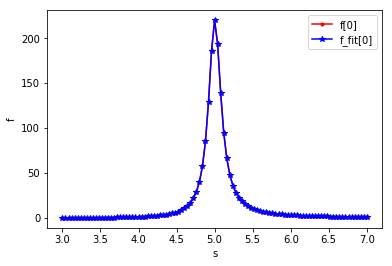

In [4]:
# plot
plt.plot(s, f[0], 'r.-', label='f[0]')
plt.plot(s, f_fit[0], 'b*-', label='f_fit[0]')
plt.xlabel('s')
plt.ylabel('f')
plt.legend()
plt.show()

### Large problem

In [5]:
Ns = 50000
N = 1000
s = np.linspace(1.e-2, 5.e3, Ns)
poles = np.linspace(1.1e-2, 4.8e+3, N/2);
poles = poles + poles*0.01j
poles = np.sort(np.append(poles, np.conj(poles)))
residues = np.linspace(1e+2, 1e+6, N/2);
residues = residues + residues*0.5j
residues = np.sort(np.append(residues, np.conj(residues)))
residues = residues.reshape((1, N))
f = np.zeros((1, Ns))
for p, r in zip(poles, residues[0]):
    f[0] += (r/(s - p)).real
weight = 1.0/f

poles_init = np.linspace(1.2e-2, 4.7e+3, N/2);
poles_init = poles_init + poles_init*0.01j
poles_init = np.sort(np.append(poles_init, np.conj(poles_init)))

In [6]:
%time residues_fit, cf, poles_fit, rms, f_fit = m.vectfit(f, s, poles_init, weight)
rms

CPU times: user 4min 46s, sys: 6min 30s, total: 11min 17s
Wall time: 1min 34s


0.005450713259715198

In [7]:
np.testing.assert_allclose(f, f_fit, 1e-2)